In [1]:
%matplotlib inline
import sys
sys.path.append('RubiksCube_TwophaseSolver')
import solver as sv

loading conj_twist table...
loading conj_ud_edges table...
loading flipslice sym-tables...
loading move_twist table...
loading move_flip table...
loading move_slice_sorted table...
loading move_u_edges table...
loading move_d_edges table...
loading move_ud_edges table...
loading move_corners table...
loading phase1_prun table...
loading phase2_prun table...
loading phase2_cornsliceprun table...


In [2]:
from RubiksCube_TwophaseSolver import cubie, face
from compatibility import *

In [3]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

from keras.utils import np_utils

from keras.models import load_model
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


DDULUDLUDLFFRRUDLBBLFRFDUULBRBBDBLURFFUFLBFDRRLRBBRDFU
F2 R2 B3 F3 D2 L2 B1 D2 F3 R1 D1 F3 D2 B2 U3 R3 D1 F1 U1 F1 


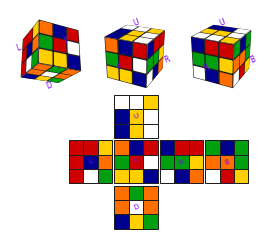

In [4]:
cb3 = cubie.CubieCube()
cb3.randomize()
renderCubie(cb3)
print(cb3.to_facelet_cube().to_string())
sol = solveCubie(cb3,False)
print(sol)

UUUUUUUUURRRRRRRRRFFFFFFFFFDDDDDDDDDLLLLLLLLLBBBBBBBBB



Exception in thread Thread-10:
Traceback (most recent call last):
  File "/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/Users/borgor/Documents/CMPS140/cubeAI/Dataset_generation/RubiksCube_TwophaseSolver/solver.py", line 193, in run
    self.search(self.co_cube.flip, self.co_cube.twist, self.co_cube.slice_sorted, dist, togo1)
  File "/Users/borgor/Documents/CMPS140/cubeAI/Dataset_generation/RubiksCube_TwophaseSolver/solver.py", line 114, in search
    m = self.sofar_phase1[-1]
IndexError: list index out of range



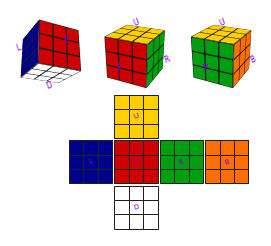

In [5]:
cb3 = cubie.CubieCube()
#cb3.randomize()
renderCubie(cb3)
print(cb3.to_facelet_cube().to_string())
sol = solveCubie(cb3,False)
print(sol)

In [6]:
#dtrain,ltrain = makeData(1000000)

In [7]:
#np.save("data",dtrain)
#np.save("labels",ltrain)

In [8]:
#X_train = dtrain
#Y_train = np_utils.to_categorical(ltrain)

In [9]:
'''
model = Sequential()
model.add(Dense(1024, input_shape=(54,)))
model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
                           
model.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(18))
model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.
'''

'\nmodel = Sequential()\nmodel.add(Dense(1024, input_shape=(54,)))\nmodel.add(Activation(\'relu\')) # An "activation" is just a non-linear function applied to the output\n                              # of the layer above. Here, with a "rectified linear unit",\n                              # we clamp all values below 0 to 0.\n                           \nmodel.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data\nmodel.add(Dense(1024))\nmodel.add(Activation(\'relu\'))\nmodel.add(Dropout(0.2))\nmodel.add(Dense(1024))\nmodel.add(Activation(\'relu\'))\nmodel.add(Dropout(0.2))\nmodel.add(Dense(1024))\nmodel.add(Activation(\'relu\'))\nmodel.add(Dropout(0.2))\nmodel.add(Dense(1024))\nmodel.add(Activation(\'relu\'))\nmodel.add(Dropout(0.2))\nmodel.add(Dense(1024))\nmodel.add(Activation(\'relu\'))\nmodel.add(Dropout(0.2))\nmodel.add(Dense(1024))\nmodel.add(Activation(\'relu\'))\nmodel.add(Dropout(0.2))\nmodel.add(Dense(18))\nmodel.add(Activa

In [10]:
#model.compile(loss='categorical_crossentropy', optimizer='adam')

In [11]:
#model.fit(X_train, Y_train, batch_size=256, epochs=1, verbose=1)

In [12]:
#model.save("model")

In [13]:
#dtest,ltest  = makeData(1000)

In [14]:
#predicted_classes = model.predict_classes(dtest)
#sum(ltest == predicted_classes),predicted_classes.size

In [15]:
model = load_model("model")